In [1]:
import numpy as np
from scipy.stats import multivariate_normal as mvn
import kombine

Import some cool visualization stuff.

In [2]:
from matplotlib import pyplot as plt
import triangle
import prism

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

prism.inline_ipynb()

# 2-D Gaussian Distribution -- using a PDF function with arguments

In [3]:
ndim = 2

Construct a function to evaluate the log PDF

In [4]:
def log_pdf(x, mean, cov):
    return mvn.logpdf(x, mean=mean, cov=cov)

Generate a random covariance matrix and construct the target.

In [5]:
A = np.random.rand(ndim, ndim)
mean = np.random.normal(0, 1., size=ndim)
cov = A*A.T + ndim*np.eye(ndim);

Create a uniformly distributed ensemble and burn it in.

In [6]:
nwalkers = 500                    
sampler = kombine.Sampler(nwalkers, ndim, log_pdf, args=(mean,cov))

p0 = np.random.uniform(-10, 10, size=(nwalkers, ndim))
p, post, q = sampler.burnin(p0)

See what burnin did.

In [7]:
prism.corner(sampler.chain, truths=mean)

Plot the independent samples:

18176 independent samples collected with a mean ACL of 3.022.


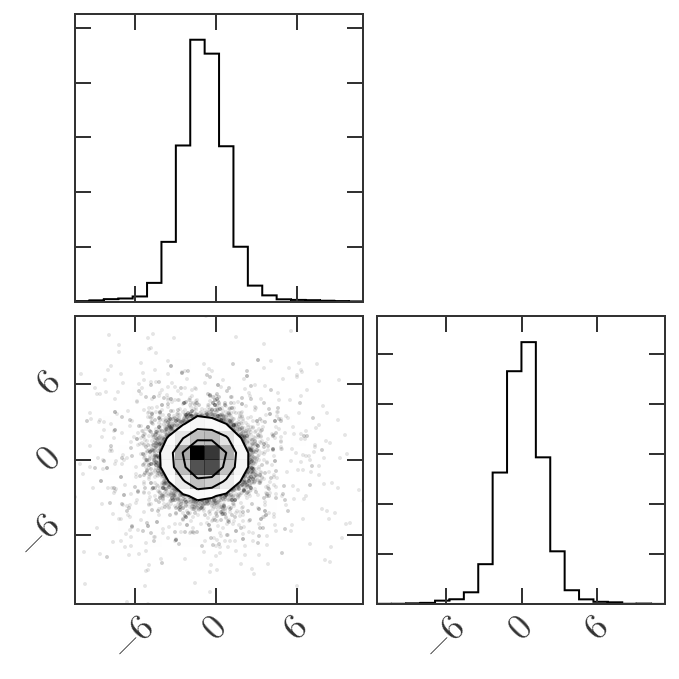

In [8]:
acls = np.ceil(2/np.mean(sampler.acceptance[-100:], axis=0) - 1).astype(int)

ind_samps = np.concatenate([sampler.chain[-100::acl, c].reshape(-1, 2) for c, acl in enumerate(acls)])
print "{} independent samples collected with a mean ACL of {}.".format(len(ind_samps), np.mean(acls))

triangle.corner(ind_samps);